# CSC421 Fall 2021 Assignment 3 
### Author: George Tzanetakis 

This notebook is based on the topics covered in **Chapter 12 - Quantifying Uncertainty **, **Chapter 13 Probabilistic Reasoning** from the book *Artificial Intelligence: A Modern Approach.*  You are welcome and actually it can be educational to look at the code at the aima-code repository as well as other code resources you can find on the web. However, make sure you understand any code that you incoporate. 

The assignment structure is as follows - each item is worth 1 point: 

1. Snakes and ladder simulation (Basic) - basic rolling and movement simulation, no ladders/snakes 
2. Snakes and ladder simulation (Basic) - multiple simulations and recording of number of rolls 
3. Snakes and ladder simulation (Expected) - adding of user-specified ladders/snakes 
4. Snakes and ladder simulation (Expected) - simulation to determine probability distribution of number of rolls 
5. Snakes and ladder simulation (Advanced) - exact inference + simulation with different ending rules 
6. Naive Bayes text classsification (Basic) - conditional probabilities for dictionary words 
7. Naive Bayes text classification (Basic) - markdown equations for Bernoulli 
8. Naive Bayes text classification (Expected) - prediction of movie review polarity 
9. Naive Bayes text classification (Expected) - classification accuracy and confusion matrix 
10. Naive Bayes text classification (Advanced) - probabilitistic generation of movie reviews 

The grading will be done in 0.5 increments. 1 point for correct answer, 0.5 points for partial or incorrect 
but reasonable answer and 0.0 for no answer or completely wrong answer. 


# Introduction 

This question uses the board game of snakes and ladders to explore the concepts behind probability, 
stochastic simulation as well as exact and approximate inference. I assume that most of you are familiar 
with snakes and ladders. If you need a refresher check the following link: 

https://www.ymimports.com/pages/how-to-play-snakes-and-ladders




# Question 1 (Basic)  - 1 point

Your first task will be to write a simple movement simulator on a snakes and ladders board. 
For this question you can ignore the snakes and ladders and just simply assume you only 
have to deal with moving. You will need to simulate rolling the die - this can be done 
by using the Python *random* module and the *randint* method. Your function *play_game* 
will take as input the length of the board (an integer), "play" the game by rolling the die 
multiple times until the sum of rolls is larger or equal to the length of the board.  (note: 
this is one of the possible and simplest end rules). The function should return the total 
number of rolls required to finish the the particular game that was played. Obviously 
this number will vary as it depends on the specific random rolls performed during the movement 
simulation. 






In [36]:
# YOUR CODE GOES HERE 
import random 
    
# function returns the total number of rolls required to finish the particular game that was played 
# this number will vary depending on the specific random rolls performed during the movement simulation 

def play_game(board_len):
    moves = 0
    pos = 0
    while (pos < board_len):  #less than boadd len 
        moves += 1     #count moves 
        die_roll = random.randint(1,6)   #roll die 
    
        pos = pos + die_roll
        if (pos > board_len): #done   #play game by rolling the die multiple times until the sum of the rolls is larger or equal to the length of the board 
            break 
    
    return moves
    
print(play_game(100))


31


# Question 2 (Basic) - 1 point

Your next task is to collect information about the probability distribution of number of rolls using the *play_game* function you implemented in the previous subquestion. Simulate playing the game 1000 times with a board length of 100 and record the number of rolls for each simulation. Show the histogram of the number of rolls for this simulation. You don't need to plot the histogram but can simply show the counts for each number of rolls as text. You can also create a plot using either the *matplotlib* or *bokeh* plotting frameworks. Make sure you include appropriate pip install and import statements in your notebook and check that it works in the Jupyterhub of the course. 



In [41]:
!pip install matplotlib
!pip intall numpy


  Using cached matplotlib-3.4.3-cp39-cp39-manylinux1_x86_64.whl (10.3 MB)
     |████████████████████████████████| 15.7 MB 56.2 MB/s eta 0:00:01██▎                    | 5.5 MB 4.6 MB/s eta 0:00:03
  Using cached kiwisolver-1.3.2-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
     |████████████████████████████████| 3.1 MB 30.4 MB/s eta 0:00:01
ERROR: unknown command "intall" - maybe you meant "install"


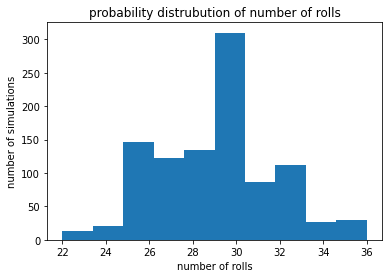

In [52]:
# YOUR CODE GOES HERE 
import random 
import numpy as np
from matplotlib import pyplot as plt

   
def play_game(board_len):
    moves = 0  #the number of times you roll
    pos = 0
    while (pos < board_len):  #less than boadd len 
        moves += 1     #count moves 
        die_roll = random.randint(1,6)   #roll die 
    
        pos = pos + die_roll
        if (pos > board_len): #done   #play game by rolling the die multiple times until the sum of the rolls is larger or equal to the length of the board 
            break 
    
    return moves

simulation = []
simulation = [play_game(100) for i in range(1000)]

#print(simulation)
#print(len(simulation))

#collect information about the probability distrubution of number of rolls 

#record the number of rolls for each simulation
#

#bins = np.arange(20, 40, 1) # fixed bin size
#plt.hist(simulation, bins=bins, alpha=1)
plt.hist(simulation)
plt.title('probability distrubution of number of rolls')
plt.xlabel('number of rolls')
plt.ylabel('number of simulations')
plt.show()

#probability distribution of the number of rolls using the play_game function

#simulate playing 1000 games
#board length 100 
#record the number of rolls for each simulation

# Question 3 (Expected) 1 point 

Extent your *play_game* method to take as input a specification of snake and ladder positions and then perform the appropriate movement simulation. Just as before playing the game returns the number of rolls required to finish the game using the same simple end rule as the previous subquestions. 

<img src="snakes_ladders.png" width="50%"/>

The snake and ladders positions will be encoded as a list of tuples. If the first number of the tuple is smaller than the second one it is ladder otherwise it is a snake. For example two of the snakes and one of the ladders
in the board above would be represented as: 

In [50]:
snakeA = (34,6)
snakeB = (32,10)
ladderC = (1,38)
snake_ladder_list = [snakeA,snakeB,ladderC]
print(snake_ladder_list)


[(34, 6), (32, 10), (1, 38)]


Your play game function should take as input the snake and ladder specification. For testing and experiments use the board provided in the image above. 

In [113]:
# YOUR CODE GOES HERE 

#Extent your play_game method to take as input a specification of snake and ladder 
#positions and then perform the appropriate movement simulation. 
#Just as before playing the game returns the number of rolls required to finish the game 
#using the same simple end rule as the previous subquestions.
#The snake and ladders positions will be encoded as a 
#list of tuples. If the first number of the tuple is smaller than the 
#second one it is ladder otherwise it is a snake. 

def play_game(board_len,snakes_ladders):
    moves = 0  #the number of times you roll
    pos = 0
    num = 0

             
    #position(in snakeladder)-->pos(,beside)
      
    while (pos < board_len):  #less than boadd len 
        moves += 1     #count moves 
        die_roll = random.randint(1,6)   #roll die 
    
        pos = pos + die_roll
              
        for item in snakes_ladders:
            if item[0] == pos:
               # print("pos",pos)
                pos = item[1]
               # print(pos)
        
        if (pos > board_len): 
            break 
            
      
    
    return moves


LadderA = (1,38)
LadderB = (4,14)
LadderC = (8,10) 
LadderD = (21,42) 
LadderE = (28,76)
LadderF = (50,67)
LadderG = (71,92)
LadderH = (80,99) 
SnakeI = (32,10)
SnakeJ = (36,6)
SnakeK = (48,26)
SnakeL = (62,18)
SnakeM = (88,24)
SnakeN = (95,56)
SnakeO = (97,78)

snakes_ladders = [LadderA,LadderB,LadderC,LadderD,LadderE,LadderF,LadderG,LadderH,SnakeI,SnakeJ,SnakeK,SnakeL,SnakeM,SnakeN,SnakeO]

#print(snakes_ladders)
#items = ([item for item in snakes_ladders if item[0] == 1])
#print(items)

#print(num[0])
 
    
print(play_game(100,snakes_ladders))
   
   #look thru list


11


# QUESTION 4 (EXPECTED) - 1 point

Use the full game simulation that incoprorates the snakes and ladders, simulate 1000 games and record 
probability distribution of the number of rolls as a histogram similarly to the previous subquestion. 
Modify your code to support the following additional ending variations: 

* Exact landing: the piece needs to end exactly at the last square. If the roll exceeds the square then it is discarded but counted for the number of rolls 
* Bounce back variation:  If the roll is too high, the player's piece will bounce off the last space and move back. For example, if a player had four spaces to get to 100 and rolled a 6, the piece will move four spaces to 100, then “bounce back" two spaces to 98.


Show the histogram of the number of rolls for each ending variation. 

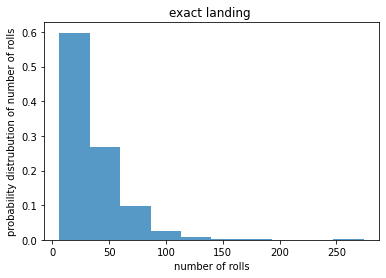

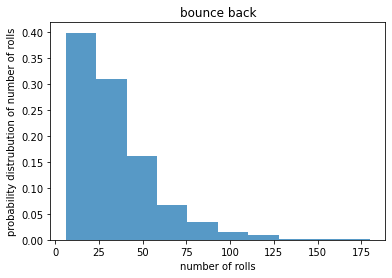

In [122]:
# YOUR CODE GOES HERE

#simulate 1000 games and record probability distrbution of the number of rolls as hsitogram 

#2 ending variations

#exact landing: the piece needs to end exactly at the last square
#if the roll exceeds the square then it is discarded by counted for the number of rolls 
def play_game_exact_landing(board_len,snakes_ladders):
    moves = 0  #the number of times you roll
    pos = 0
    num = 0
      
    while (pos < board_len):  #less than boadd len 
        moves += 1     #count moves 
        die_roll = random.randint(1,6)   #roll die 
        pos = pos + die_roll
        
        for item in snakes_ladders:
            if item[0] == pos:
               # print("pos",pos)
                pos = item[1]
               # print(pos)
        
        if (pos == board_len):  #must be == to board_len otherwise ... 
            break  
        #if (pos > board_len):  #if  If the roll exceeds the square then it is discarded but counted for the number of rolls

    return moves

#bounce back variabation: if the roll is too high the player's piece will bounce off the last space and move back 
#eg. if a player had four spaces to get to 100 and rolled a 6, the pieve will move four spaces to 100, then bounce back two spaces to 98
def play_game_bounce_back(board_len,snakes_ladders):
    moves = 0  #the number of times you roll
    pos = 0
    num = 0
      
    while (pos < board_len):  #less than boadd len 
        moves += 1     #count moves 
        die_roll = random.randint(1,6)   #roll die 
        pos = pos + die_roll
       
        for item in snakes_ladders:
            if item[0] == pos:
               # print("pos",pos)
                pos = item[1]
               # print(pos)
        
        if (pos == board_len):  #if roll is too high 
            break    
        if (pos > board_len):  #if roll is too high 
            #board len = 100
            #pos = 96 
           # die_roll = 6
            #board_len- pos = 4
                          #6           #100   -  96 = 4   (6-4) =2    
            bounce_back = die_roll - (board_len - pos)
            #98  = 100.  - 2 
            pos = board_len - bounce_back
        
    return moves


LadderA = (1,38)
LadderB = (4,14)
LadderC = (8,10) 
LadderD = (21,42) 
LadderE = (28,76)
LadderF = (50,67)
LadderG = (71,92)
LadderH = (80,99) 
SnakeI = (32,10)
SnakeJ = (36,6)
SnakeK = (48,26)
SnakeL = (62,18)
SnakeM = (88,24)
SnakeN = (95,56)
SnakeO = (97,78)

snakes_ladders = [LadderA,LadderB,LadderC,LadderD,LadderE,LadderF,LadderG,LadderH,SnakeI,SnakeJ,SnakeK,SnakeL,SnakeM,SnakeN,SnakeO]

#show histogram for exact landing ending variation 
simulationSL_exact = []
simulationSL_exact = [play_game(100,snakes_ladders) for i in range(1000)]

#plt.hist(simulationSL_exact)
n, bins, patches = plt.hist(simulationSL_exact, weights=np.ones_like(simulationSL_exact) / len(simulationSL_exact),
                            alpha=0.75)
plt.title('exact landing ')
plt.xlabel('number of rolls')
plt.ylabel('probability distrubution of number of rolls')
plt.show()

#show histogram for bounce back ending variation
simulationSL_bounce = []
simulationSL_bounce = [play_game(100,snakes_ladders) for i in range(1000)]

#plt.hist(simulationSL_bounce)
n, bins, patches = plt.hist(simulationSL_bounce, weights=np.ones_like(simulationSL_bounce) / len(simulationSL_bounce),
                            alpha=0.75)
plt.title('bounce back')
plt.xlabel('number of rolls')
plt.ylabel('probability distrubution of number of rolls')
plt.show()



# QUESTION 5 (ADVANCED) - 1 point 

In this question the goal is to perform exact probabilistic inference for the number of rolls. Rather than simulating the game and recording the number of moves you will need to compute systematically the probabilities of every possible sequence of rolls. You should use the simplified version of board movement with no snakes and ladders and the simple landing rule. As an example let's consider a very short board of 4 squares. The only sequence of 1 roll that finishes the game is rolling a 4 which has $P(4) = 1/6$. For two rolls we have more possibilities such as 1,3 or 3,1 or 2,2 or 2,3 or 3,2 etc. For example the probability of (1,3) is $P(1,3) = 1/6 * 1/6$. Your code should systematically calculate the right products and sums to come up with probabilities for 
each possible number of rolls. To make this a bit simpler consider a board of length $25$. I advise that you first start by looking at very short boards and checking some of the calculations by hand. 

Compare the results you get from exact inference with the results you get from approximate inference for the same board length. 

In [10]:
# YOUR CODE GOES HERE 





# Extra ideas (no credit) 

* Implement a GUI for showing the snakes/ladders board and support multiple players 


# Text Categorization


Text categorization is the task of assigning a given document to one of a fixed set of categories, on the basis of text it contains. Naive Bayes models are often used for this task. In these models, the query variable is
the document category, and the effect variables are the presence/absence
of each word in the language; the assumption is that words occur independently in documents within a given category (condititional independence), with frequencies determined by document category. Download the following file: http://www.cs.cornell.edu/People/pabo/movie-review-data/review_polarity.tar.gz containing a dataset that has been used for text mining consisting of movie reviews classified into negative and positive. You
will see that there are two folders for the positivie and negative category and they each contain multiple text files with the reviews. You can find more information about the dataset at: 
http://www.cs.cornell.edu/People/pabo/movie-review-data/


Our goal will be to build a simple Naive Bayes classifier for this dataset. More complicated approaches using term frequency and inverse document frequency weighting and many more words are possible but the basic concepts
are the same. The goal is to understand the whole process so DO NOT use existing machine learning packages but rather build the classifier from scratch.

Our feature vector representation for each text file will be simply a binary vector that shows which of the following words are present in the text file: Awful Bad Boring Dull Effective Enjoyable Great Hilarious. For example the text file cv996 11592.txt would be represented as (0, 0, 0, 0, 1, 0, 1, 0) because it contains Effective and Great but none of the other words.

# Question 6 (Basic) -1 point

Write code that parses the text files and calculates the probabilities for each dictionary word given the review polarity


In [2]:
#! pip install tabulate
! pip install os
#! pip install numpy 
#! pip install random

  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
  Using cached numpy-1.21.4-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random


In [110]:
# YOUR CODE GOES HERE 

#build a simple Naive Bayes classifier for this dataset.


#words occur independently in documents within a given category (condititional independence), with frequencies determined by document category. 
#text file::

#dictionary word:: 
#Our feature vector representation for each text file will be simply a 
#binary vector that shows which of the following words are present in the 
#text file: Awful Bad Boring Dull Effective Enjoyable Great Hilarious. 
#For example the text file cv996 11592.txt would be represented as (0, 0, 0, 0, 1, 0, 1, 0) because it contains Effective and Great but none of the other words.

import os
#import numpy as np
#from tabulate import tabulate
#from random import random

words = ['awful', 'bad', 'boring', 'dull', 'effective', 'enjoyable', 'great', 'hilarious']

words_p = {'awful':0,'bad':0,'boring':0, 'dull':0,'effective':0,'enjoyable':0,'great':0,'hilarious':0}
words_n = {'awful':0,'bad':0,'boring':0, 'dull':0,'effective':0,'enjoyable':0,'great':0,'hilarious':0}
found = {'awful':0,'bad':0,'boring':0, 'dull':0,'effective':0,'enjoyable':0,'great':0,'hilarious':0}

def parse_text():  
    
    #found = 0
    
    path = "/home/jovyan/assignment-3/txt_sentoken/pos"
    for subdir, dirs, files in os.walk(path):                #https://stackoverflow.com/questions/10377998/how-can-i-iterate-over-files-in-a-given-directory
        for file in files:
            
           
        
        #print os.path.join(subdir, file)
            filepath = subdir + os.sep + file
            readfile = open('/home/jovyan/assignment-3/txt_sentoken/pos' + os.sep + file)
            for key in found:
                found[key] = 0

            for lines in readfile.readlines():
                line = lines.split()
                    #print(line)
                   # if found == 0:
                for word in words:
                    if (found[word] == 0):
                    #print(found[word])
                        #print(words_p[word])
                        if word in line:
                            found[word] = 1 
                            words_p[word] += 1    #adjust count 
                                      

    print(words_p)
                
                



print(parse_text())
 #   


{'awful': 19, 'bad': 255, 'boring': 48, 'dull': 23, 'effective': 120, 'enjoyable': 95, 'great': 408, 'hilarious': 125}
None


# Question 7 (Basic)  - 1 point 

Explain how the probability estimates for each dictionary word given the review polarity can be combined to form a Naive Bayes classifier. You can look up Bernoulli Bayes model for this simple model where only presence/absence of a word is modeled.

Your answer should be a description of the process with equations and a specific example as markdown text NOT python code. You will write the code in the next question. 

# YOUR CODE GOES HERE 

Explain how probability estimates for each dictionary word
given the review polarity can be combined to form a Naive Bayes
classifier 



Bernoulli Bayes model 




# QUESTION 8 (EXPECTED) 1 point

Write Python code for classifying a particular test instance (in our case movie review) following a Bernolli Bayes approach. Your code should calculate the likelihood the review is positive given the correspondng conditional probabilities for each dictionary word as well as the likelihood the review is negative given the corresponding conditional probabilities for each dictionary word. Check that your code works by providing a few example cases of prediction. Your code should be written from "scratch" and only use numpy/scipy but **NOT** machine learning libraries like scikit-learn or tensorflow.



In [141]:
# YOUR MARKDOWN GOES HERE 

def classify(review):
    pos = [0.034, 0.28, 0.054, 0.025, 0.154, 0.096, 0.485, 0.132]
    neg = [0.122, 0.545, 0.175, 0.101, 0.086, 0.054, 0.32, 0.059]
    
    review = review.lower()
    vector = np.array([1 if word in review else 0 for word in words])
    
    p, n = 0.5, 0.5 # P(POS), P(NEG) 
    for word, p_pos, p_neg in zip(vector, pos, neg):
        p *= p_pos if word else (1 - p_pos)
        n *= p_neg if word else (1 - p_neg)
    
    return p / (p + n), n / (p + n)

review_1 = "bad grandpa was an awfully hilarious movie. johnny knoxville was enjoyable as always, there wasn't a dull or boring moment. 5/7 great movie"
print(f'review 1: {classify(review_1)}')   

review_2 = "avatar was bad, awful, and an effective waste of $20, the only redeeming quaility was the great 3d effects"
print(f'review 2: {classify(review_2)}')

review_3 = "toy story 4 was a fantastic movie. it was a great way to wrap up the story. the ending was enjoyable yet sad. the toys antics were hilarious as always"
print(f'review 3: {classify(review_3)}')



review 1: (0.05751045743898076, 0.9424895425610192)
review 2: (0.2987254534254119, 0.7012745465745882)
review 3: (0.9235529619927509, 0.07644703800724907)


# QUESTION 9 (EXPECTED) 1 point 


Calculate the classification accuracy and confusion matrix that you would obtain using the whole data set for both training and testing. Do not use machine learning libraries like scikit-learn or tensorflow for this only the basic numpy/scipy stuff.




In [142]:
# YOUR CODE GOES HERE 
def classification_accuracy():
    matrix = np.zeros((2, 2))
    for s, d, files in os.walk('txt_sentoken'):
        for file in files:
            with open(s + os.sep + file) as f:
                pos, neg = classify(f.read().lower())
                if 'pos' in s:
                    if pos > neg:
                        matrix[0][0] += 1
                    else:
                        matrix[0][1] += 1
                else:
                    if neg > pos:
                        matrix[1][0] += 1
                    else:
                        matrix[1][1] += 1
                        
    accuracy = (matrix[0][0] + matrix[1][0]) / sum(sum(matrix))                
    return accuracy, matrix
                 
a, m = classification_accuracy()

print(f'classification accuracy: {a}')
print('confusion matrix:')
print(m.tolist()[0])
print(m.tolist()[1])



classification accuracy: 0.6705
confusion matrix:
[720.0, 280.0]
[621.0, 379.0]


# QUESTION 10 (ADVANCED) 1 point 

One can consider the Naive Bayes classifier a generative model that can generate binary feature vectors using the associated probabilities from the training data. The idea is similar to how we do direct sampling in Bayesian Networks and depends on generating random number from a discrete distribution. Describe how you would generate random movie reviews consisting solely of the words from the dictionary using your model. Show 5 examples of randomly generated positive reviews and 5 examples of randomly generated negative reviews. Each example should consists of a subset of the words in the dictionary. Hint: use probabilities to generate both the presence and absence of a word. 


# Extra ideas (no credit) 

* Check the associated README file and see what convention is used for the 10-fold cross-validation. Calculate the classification accuracy and confusion matrix using the recommended 10-fold cross-validation. Again do NOT use 
ML libraries such as scikit-learn or tensorflow and just use numpy/scipy. 
* Implement the all the question using a ML library such as scikit-learn or tensorflow and a Naive Bayes Bernoulli classifier. 
